In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import inf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
muestras= np.array(
    [[6.2206, 3.5095],
    [5.1325, 4.0181],
    [0.7597, 2.3992],
    [1.2332, 6.8391],
    [2.3995, 4.1727],
    [0.4965, 9.0272],
    [9.4479, 4.9086],
    [4.8925, 3.3772],
    [9.0005, 3.6925],
    [1.1120, 7.8025]
    ])

clases=np.array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0]);


#otro

In [3]:
X_train, X_test, y_train, y_test = train_test_split(muestras, clases, random_state=42)

model = LogisticRegression(random_state=0).fit(X_train, y_train)
model.coef_

array([[ 1.02130525, -0.27182056]])

In [4]:
model.intercept_

array([-2.82552994])

In [5]:
y_predict = model.coef_[0][0] * muestras + model.intercept_

In [6]:
y_predict

array([[ 3.52760147,  0.75874082],
       [ 2.41631924,  1.27817667],
       [-2.04964435, -0.3752144 ],
       [-1.56605631,  4.15927877],
       [-0.374908  ,  1.43607046],
       [-2.31845189,  6.39399678],
       [ 6.8236599 ,  2.18764899],
       [ 2.17120598,  0.62362214],
       [ 6.36672793,  0.94563968],
       [-1.68983851,  5.14320424]])

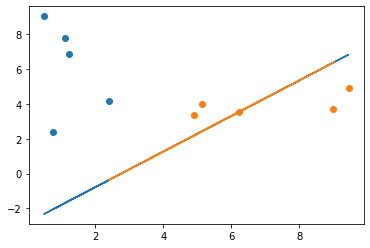

In [7]:
plt.scatter(muestras[clases==0,0], muestras[clases==0,1], label='Clase 0')
plt.scatter(muestras[clases==1,0], muestras[clases==1,1], label='Clase 1')
plt.plot(muestras,y_predict)

#Implementar el descenso del gradiente en reg logística para el ejercicio de la clase pasada.


In [21]:
t1 = 0.3
t2 = 0.4
t0 = 1
# Definir la función f(x1,x2)
def f(x1, x2):
    return  x1 * t1 + x2 * t2 +  t0

La función evaluada en el punto indica que pertenece al la clase por debajo de la linea, la clase 1

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [23]:
z = f(muestras[0],muestras[1])
s = sigmoid(z)
s = s.mean()
s

0.9838315490485793

In [24]:
np.ones((muestras.shape[0], 1))

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [25]:
X = np.append(muestras, np.ones((muestras.shape[0], 1)), axis=1)

In [26]:
X

array([[6.2206, 3.5095, 1.    ],
       [5.1325, 4.0181, 1.    ],
       [0.7597, 2.3992, 1.    ],
       [1.2332, 6.8391, 1.    ],
       [2.3995, 4.1727, 1.    ],
       [0.4965, 9.0272, 1.    ],
       [9.4479, 4.9086, 1.    ],
       [4.8925, 3.3772, 1.    ],
       [9.0005, 3.6925, 1.    ],
       [1.112 , 7.8025, 1.    ]])

In [27]:
def f(X, theta):
  return X.dot(theta)

In [28]:
from sklearn.metrics import log_loss

In [29]:
alpha = 0.01
theta0 = np.random.uniform(-2, 2)
theta1 = np.random.uniform(-2, 2)
theta2 = np.random.uniform(-2, 2)


for i in range(200):
  y_predict=sigmoid(f(X, np.array([theta1, theta2, theta0])))
  print(y_predict)
  d_theta0 = 2 * np.sum((y_predict-clases)) / 20
  d_theta1 = 2 * np.sum((y_predict-clases) * X[:, 0]) / 20
  d_theta2 = 2 * np.sum((y_predict-clases) * X[:, 1]) / 20

  theta0 -= alpha * d_theta0
  theta1 -= alpha * d_theta1
  theta2 -= alpha * d_theta2
  print(log_loss(clases, y_predict))

[0.95780277 0.97962347 0.88210507 0.9996262  0.98611495 0.99998068
 0.9915676  0.95416309 0.96001306 0.99989715]
3.450297644023041
[0.9518699  0.97646333 0.87366654 0.99953832 0.98408211 0.99997464
 0.98977632 0.94825493 0.9535488  0.9998694 ]
3.3599621472773173
[0.94522776 0.97286273 0.86476806 0.99943039 0.98177365 0.99996676
 0.98763611 0.94170045 0.94619901 0.99983436]
3.2705201311439263
[0.93782691 0.9687755  0.85540763 0.99929805 0.97915867 0.99995648
 0.98509103 0.9344595  0.93789239 0.99979017]
3.182068636240104
[0.92962415 0.96415508 0.84558715 0.99913612 0.9762046  0.99994311
 0.98208062 0.9264973  0.92856697 0.99973457]
3.094709712933681
[0.92058534 0.958956   0.83531283 0.9989384  0.97287764 0.99992576
 0.97854107 0.91778657 0.91817508 0.99966478]
3.0085489998222466
[0.91068853 0.9531355  0.82459554 0.99869758 0.96914333 0.99990328
 0.97440719 0.90830987 0.90668867 0.99957737]
2.923693837102669
[0.89992696 0.94665563 0.81345106 0.99840502 0.96496722 0.99987425
 0.96961492 0

In [30]:
x1_nuevo = np.random.randint(0,10,size=10)
x1_nuevo

array([2, 2, 7, 2, 8, 1, 5, 8, 4, 5])

In [31]:
x2_nuevo = -((theta1 * x1_nuevo)/theta2) - (theta0/theta2)

In [32]:
x2_nuevo

array([ 0.46368133,  0.46368133, 14.15768114,  0.46368133, 16.8964811 ,
       -2.27511863,  8.68008122, 16.8964811 ,  5.94128126,  8.68008122])

In [33]:
(y_predict > 0.5).astype("int")

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0])

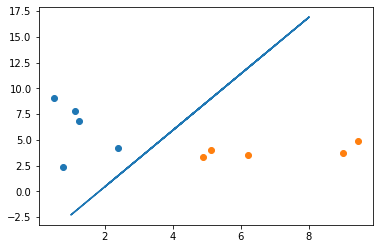

In [34]:
plt.scatter(muestras[clases==0,0], muestras[clases==0,1], label='Clase 0')
plt.scatter(muestras[clases==1,0], muestras[clases==1,1], label='Clase 1')
plt.plot(x1_nuevo,x2_nuevo)